# Speichersimulation

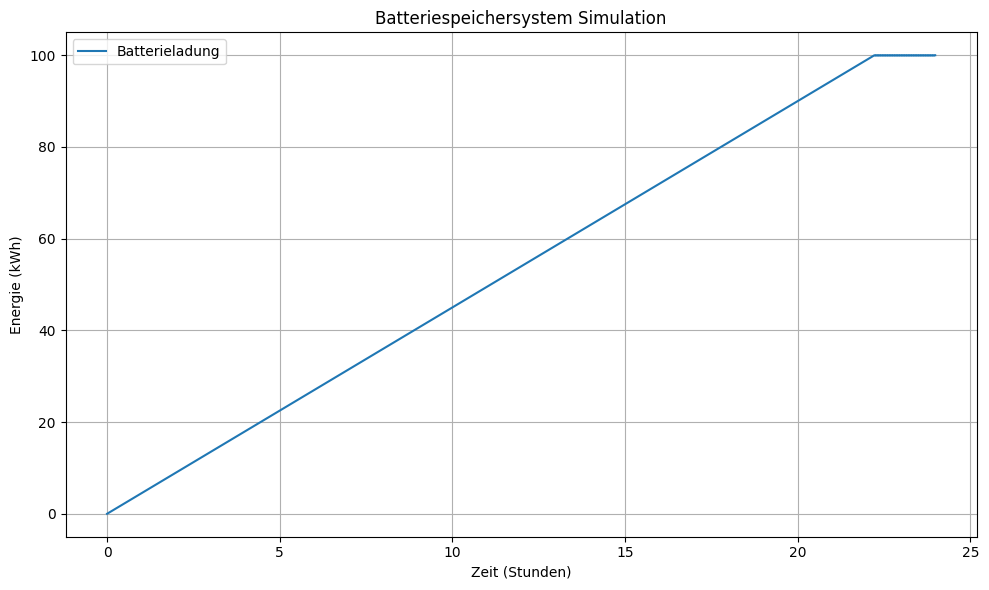

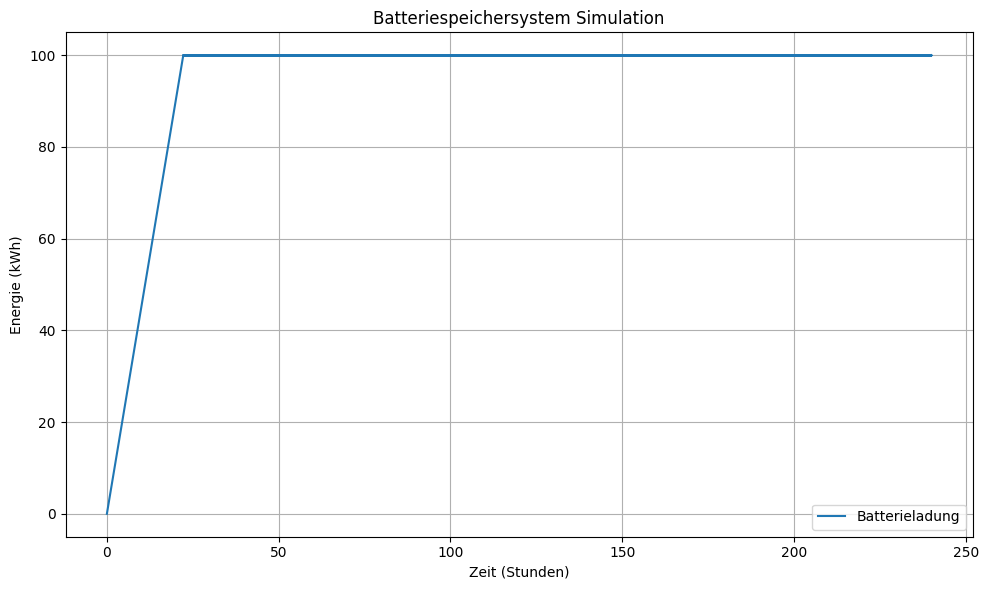

In [1]:
# V1
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np

class BatterySimulator:
    def __init__(self, root):
        self.root = root
        self.root.title("Batteriespeichersystem Simulation")
        
        # Default Parameter
        self.capacity = tk.DoubleVar(value=100.0)  # Kapazität der Batterie in kWh
        self.charge_rate = tk.DoubleVar(value=5.0)  # Lade-/Entladerate in kW
        self.charge_efficiency = tk.DoubleVar(value=0.9)  # Ladeeffizienz
        self.discharge_efficiency = tk.DoubleVar(value=0.95)  # Entladeeffizienz
        self.simulation_time = tk.IntVar(value=24)  # Simulationsdauer in Stunden
        self.time_resolution = tk.IntVar(value=1)  # Zeitaufteilung in Minuten
        
        # GUI erstellen
        self.create_widgets()
        
    def create_widgets(self):
        # Rahmen für Eingabefelder
        frame_inputs = ttk.LabelFrame(self.root, text="Parameter")
        frame_inputs.grid(row=0, column=0, padx=10, pady=10, sticky="nsew")
        
        # Eingabefelder
        ttk.Label(frame_inputs, text="Kapazität (kWh):").grid(row=0, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.capacity).grid(row=0, column=1, padx=5, pady=5)
        
        ttk.Label(frame_inputs, text="Lade-/Entladerate (kW):").grid(row=1, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.charge_rate).grid(row=1, column=1, padx=5, pady=5)
        
        ttk.Label(frame_inputs, text="Ladeeffizienz:").grid(row=2, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.charge_efficiency).grid(row=2, column=1, padx=5, pady=5)
        
        ttk.Label(frame_inputs, text="Entladeeffizienz:").grid(row=3, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.discharge_efficiency).grid(row=3, column=1, padx=5, pady=5)
        
        ttk.Label(frame_inputs, text="Simulationsdauer (Stunden):").grid(row=4, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.simulation_time).grid(row=4, column=1, padx=5, pady=5)
        
        ttk.Label(frame_inputs, text="Zeitaufteilung (Minuten):").grid(row=5, column=0, padx=5, pady=5, sticky="w")
        ttk.Entry(frame_inputs, textvariable=self.time_resolution).grid(row=5, column=1, padx=5, pady=5)
        
        # Button für die Simulation starten
        ttk.Button(self.root, text="Simulation starten", command=self.run_simulation).grid(row=1, column=0, pady=10)
    
    def run_simulation(self):
        # Batteriesimulation durchführen
        capacity = self.capacity.get()
        charge_rate = self.charge_rate.get()
        charge_efficiency = self.charge_efficiency.get()
        discharge_efficiency = self.discharge_efficiency.get()
        simulation_time = self.simulation_time.get()
        time_resolution = self.time_resolution.get()
        
        # Simulationsdaten berechnen (vereinfachtes Modell)
        time_steps = np.arange(0, simulation_time, time_resolution / 60.0)  # in Stunden umwandeln
        energy = np.zeros_like(time_steps)
        
        for i in range(1, len(time_steps)):
            # Vereinfachte Berechnung der Batterieladung
            if energy[i-1] < capacity:
                energy[i] = min(capacity, energy[i-1] + charge_rate * charge_efficiency * (time_resolution / 60.0))
            else:
                energy[i] = max(0, energy[i-1] - charge_rate / discharge_efficiency * (time_resolution / 60.0))
        
        # Ergebnisse anzeigen (Grafik)
        plt.figure(figsize=(10, 6))
        plt.plot(time_steps, energy, label="Batterieladung")
        plt.xlabel("Zeit (Stunden)")
        plt.ylabel("Energie (kWh)")
        plt.title("Batteriespeichersystem Simulation")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Hauptprogramm
if __name__ == "__main__":
    root = tk.Tk()
    app = BatterySimulator(root)
    root.mainloop()


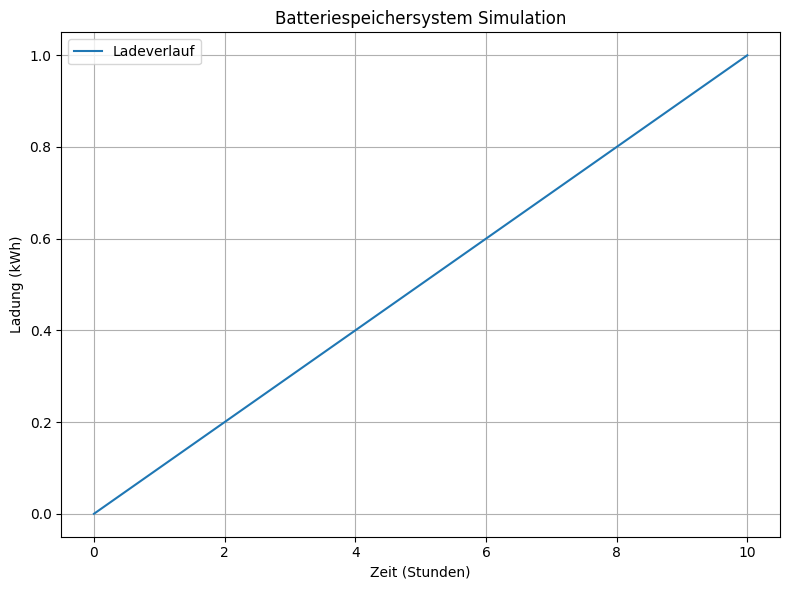

In [2]:
# V2
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import numpy as np

# Funktion zur Berechnung des Ladeverlaufs der Batterie
def simulate_battery(capacity, charge_current, charge_voltage):
    time = np.linspace(0, 10, 100)  # Beispielzeitachse von 0 bis 10 Stunden
    charge = charge_current * time / capacity  # Beispiel Ladungsverlauf
    return time, charge

# Funktion zur Erstellung der GUI
def create_gui():
    # Hauptfenster
    root = tk.Tk()
    root.title("Batteriespeichersystem Simulation")

    # Eingabefelder und Standardwerte
    capacity_var = tk.DoubleVar(value=100)  # Beispielkapazität in kWh
    charge_current_var = tk.DoubleVar(value=10)  # Beispiel Ladestrom in A
    charge_voltage_var = tk.DoubleVar(value=400)  # Beispiel Ladespannung in V

    # Rahmen für Eingabe
    input_frame = ttk.LabelFrame(root, text="Eingabeparameter")
    input_frame.grid(row=0, column=0, padx=10, pady=5, sticky="w")

    # Eingabefelder mit Labels
    ttk.Label(input_frame, text="Kapazität (kWh):").grid(row=0, column=0, padx=5, pady=5, sticky="w")
    ttk.Entry(input_frame, textvariable=capacity_var, width=10).grid(row=0, column=1, padx=5, pady=5)

    ttk.Label(input_frame, text="Ladestrom (A):").grid(row=1, column=0, padx=5, pady=5, sticky="w")
    ttk.Entry(input_frame, textvariable=charge_current_var, width=10).grid(row=1, column=1, padx=5, pady=5)

    ttk.Label(input_frame, text="Ladespannung (V):").grid(row=2, column=0, padx=5, pady=5, sticky="w")
    ttk.Entry(input_frame, textvariable=charge_voltage_var, width=10).grid(row=2, column=1, padx=5, pady=5)

    # Button zur Berechnung und Anzeige
    def simulate_and_show():
        capacity = capacity_var.get()
        charge_current = charge_current_var.get()
        charge_voltage = charge_voltage_var.get()

        time, charge = simulate_battery(capacity, charge_current, charge_voltage)

        # Erstellung des Graphen
        plt.figure(figsize=(8, 6))
        plt.plot(time, charge, label='Ladeverlauf')
        plt.xlabel('Zeit (Stunden)')
        plt.ylabel('Ladung (kWh)')
        plt.title('Batteriespeichersystem Simulation')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        # Anzeige des Graphen
        plt.show()

    ttk.Button(root, text="Simulieren", command=simulate_and_show).grid(row=1, column=0, padx=10, pady=10)

    root.mainloop()

# Hauptprogramm: Erstellung der GUI
if __name__ == "__main__":
    create_gui()


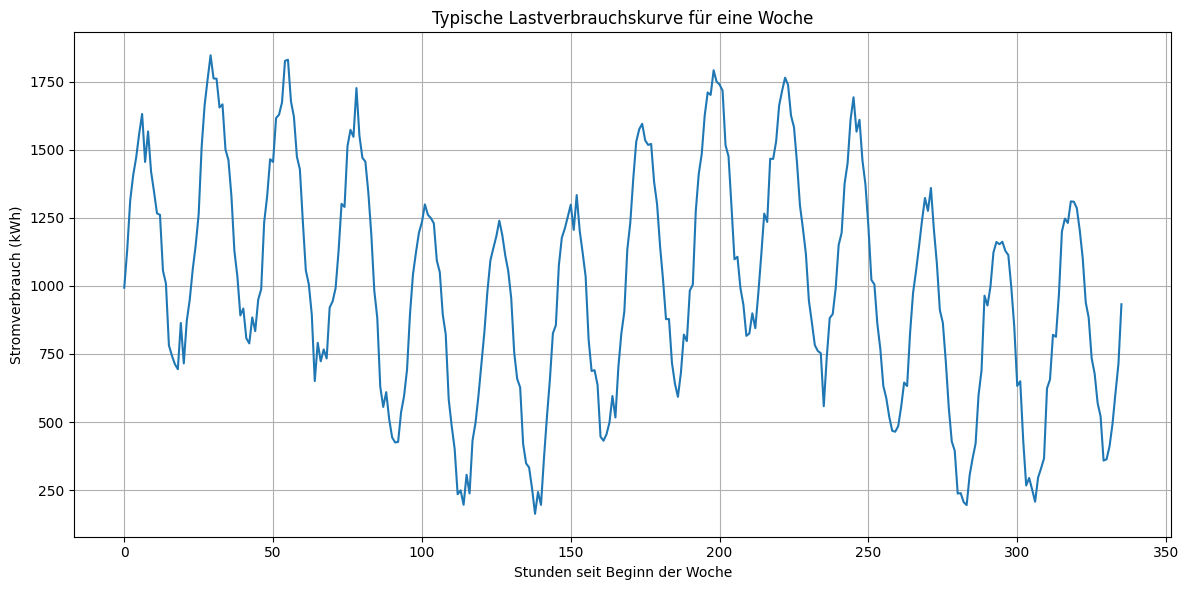

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Definiere die Anzahl der Stunden in einer Woche (7 Tage * 24 Stunden)
hours_in_week = 14 * 24

# Erzeuge eine zufällige Lastverbrauchskurve für eine Woche
# Verwendet sinusähnliche Schwankungen für tägliche und stündliche Variationen
time = np.arange(hours_in_week)
consumption = 1000 + 500 * np.sin(time * 2 * np.pi / 24) + 300 * np.sin(time * 2 * np.pi / (24 * 7))

# Füge zufälliges Rauschen hinzu, um Realismus zu simulieren
consumption += np.random.normal(0, 50, hours_in_week)

# Plotte die Lastverbrauchskurve
plt.figure(figsize=(12, 6))
plt.plot(consumption)
plt.title('Typische Lastverbrauchskurve für eine Woche')
plt.xlabel('Stunden seit Beginn der Woche')
plt.ylabel('Stromverbrauch (kWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


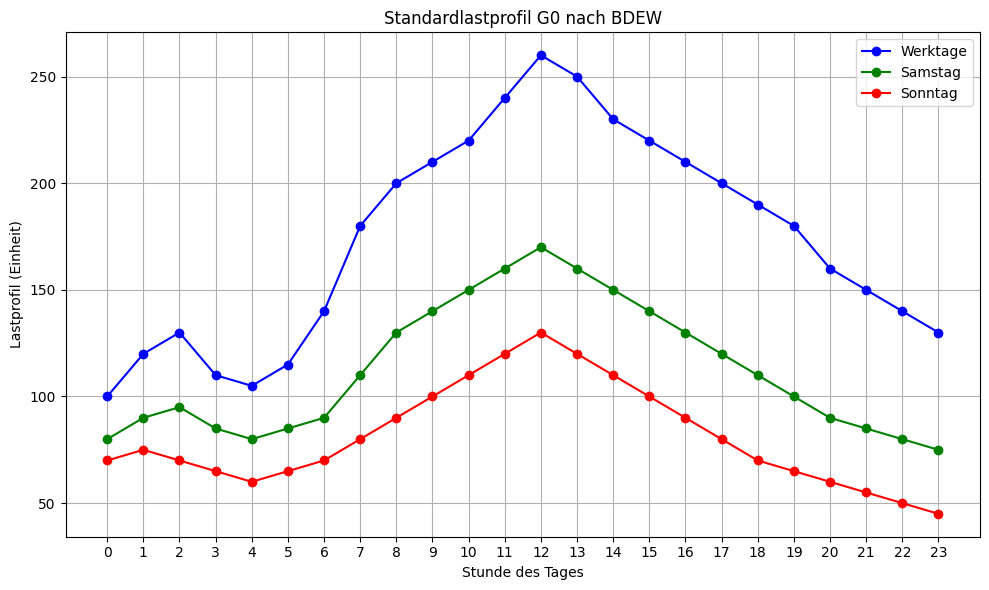

In [9]:
import matplotlib.pyplot as plt

# Beispielwerte für Werktage, Samstag und Sonntag
# Diese Werte müssen durch tatsächliche Daten ersetzt werden!
# Hier werden nur Platzhalter verwendet.
werktage_lastprofil = [100, 120, 130, 110, 105, 115, 140, 180, 200, 210, 220, 240, 260, 250, 230, 220, 210, 200, 190, 180, 160, 150, 140, 130]
samstag_lastprofil = [80, 90, 95, 85, 80, 85, 90, 110, 130, 140, 150, 160, 170, 160, 150, 140, 130, 120, 110, 100, 90, 85, 80, 75]
sonntag_lastprofil = [70, 75, 70, 65, 60, 65, 70, 80, 90, 100, 110, 120, 130, 120, 110, 100, 90, 80, 70, 65, 60, 55, 50, 45]

# Stunden des Tages
hours_of_day = list(range(24))

# Plot für Werktage
plt.figure(figsize=(10, 6))
plt.plot(hours_of_day, werktage_lastprofil, marker='o', linestyle='-', color='b', label='Werktage')
plt.plot(hours_of_day, samstag_lastprofil, marker='o', linestyle='-', color='g', label='Samstag')
plt.plot(hours_of_day, sonntag_lastprofil, marker='o', linestyle='-', color='r', label='Sonntag')

plt.title('Standardlastprofil G0 nach BDEW')
plt.xlabel('Stunde des Tages')
plt.ylabel('Lastprofil (Einheit)')
plt.xticks(hours_of_day)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


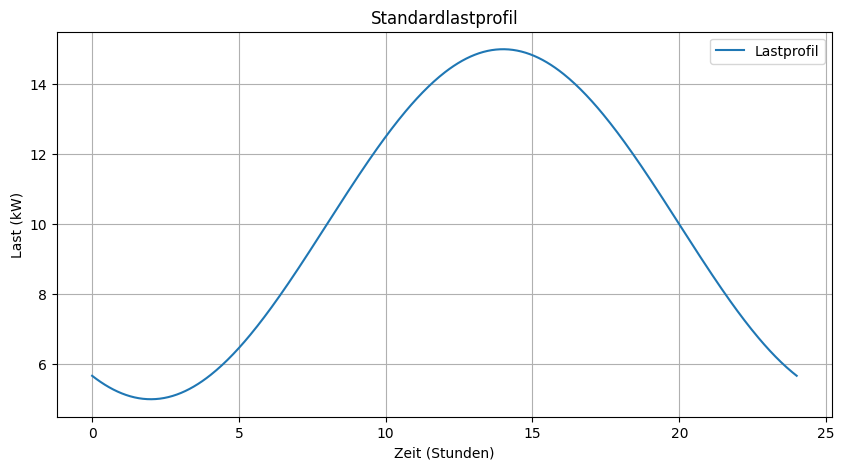

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Zeitintervall (24 Stunden)
t = np.linspace(0, 24, num=500)

# Funktion für das Lastprofil
def load_profile(t):
    return 10 + 5 * np.sin(2 * np.pi * (t-8)/24)

# Lastprofil berechnen
load = load_profile(t)

# Plot erstellen
plt.figure(figsize=(10,5))
plt.plot(t, load, label='Lastprofil')
plt.xlabel('Zeit (Stunden)')
plt.ylabel('Last (kW)')
plt.title('Standardlastprofil')
plt.grid(True)
plt.legend()
plt.show()


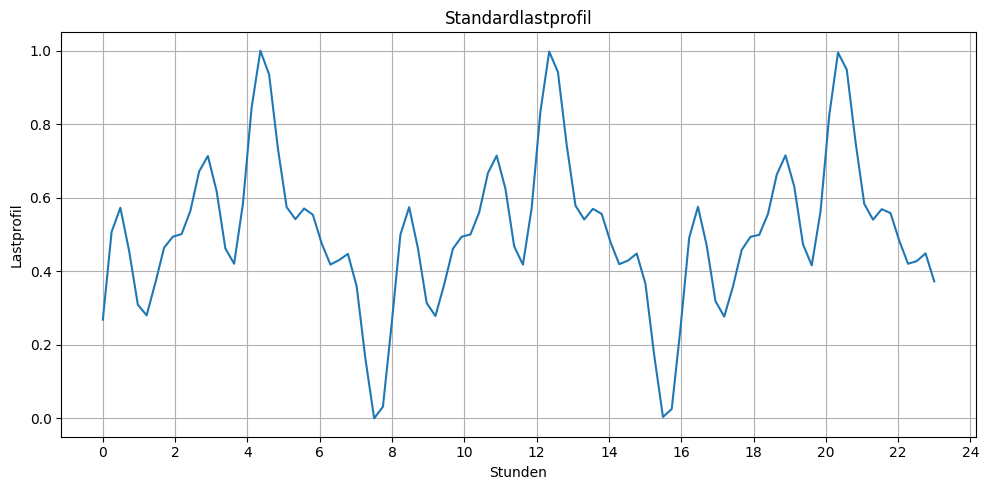

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Zeitachse für einen Tag in Stunden
hours_per_day = 24
time = np.linspace(0, 23, hours_per_day * 4)  # Feinere Zeitschritte für glattere Kurve

# Annahme eines typischen Lastprofils mit Spitzenzeiten am Morgen und Abend
base_load = 0.5  # Grundlast
peak_amplitude = 0.3  # Spitzenlastamplitude

# Erzeugung eines realistischeren Lastprofils
# Hier ein Beispiel eines typischen Lastprofils mit mehreren Peaks und Tälern
load_profile = (base_load + peak_amplitude * np.sin(2 * np.pi * time / hours_per_day * 3 - np.pi / 2) +
                0.1 * np.sin(2 * np.pi * time / hours_per_day * 6) +
                0.2 * np.sin(2 * np.pi * time / hours_per_day * 12) +
                0.15 * np.sin(2 * np.pi * time / hours_per_day * 18))

# Normalisierung auf den Bereich 0-1 (optional, je nach Bedarf)
load_profile = (load_profile - np.min(load_profile)) / (np.max(load_profile) - np.min(load_profile))

# Plot des Lastprofils
plt.figure(figsize=(10, 5))
plt.plot(time, load_profile, marker='', linestyle='-')
plt.title('Standardlastprofil')
plt.xlabel('Stunden')
plt.ylabel('Lastprofil')
plt.grid(True)
plt.xticks(np.arange(0, hours_per_day + 1, 2))
plt.tight_layout()
plt.show()


# eingabe speichern und wieder aufrufen 

In [1]:
import tkinter as tk
import pickle
import os

class PersistentEntryApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Persistent Entry")
        
        self.entry_label = tk.Label(root, text="Enter something:")
        self.entry_label.pack(pady=5)
        
        self.entry_var = tk.StringVar()
        self.load_last_entry()
        
        self.entry = tk.Entry(root, textvariable=self.entry_var)
        self.entry.pack(pady=5)
        
        self.save_button = tk.Button(root, text="Save and Quit", command=self.save_and_quit)
        self.save_button.pack(pady=20)
    
    def load_last_entry(self):
        if os.path.exists("last_entry.pkl"):
            with open("last_entry.pkl", "rb") as f:
                last_entry = pickle.load(f)
                self.entry_var.set(last_entry)
    
    def save_and_quit(self):
        with open("last_entry.pkl", "wb") as f:
            pickle.dump(self.entry_var.get(), f)
        self.root.destroy()  # Korrekte Methode zum Beenden des Programms

if __name__ == "__main__":
    root = tk.Tk()
    app = PersistentEntryApp(root)
    root.mainloop()


In [4]:
import tkinter as tk
import pickle
import os

class PersistentEntryApp:
    def __init__(self, root, num_entries=3):
        self.root = root
        self.root.title("Persistent Entry")
        
        self.entries = []
        self.entry_vars = []

        for i in range(num_entries):
            label = tk.Label(root, text=f"Enter something {i+1}:")
            label.pack(pady=5)
            
            entry_var = tk.StringVar()
            self.entry_vars.append(entry_var)
            
            entry = tk.Entry(root, textvariable=entry_var)
            entry.pack(pady=5)
            
            self.entries.append(entry)
        
        self.load_last_entries()

        self.save_button = tk.Button(root, text="Save and Quit", command=self.save_and_quit)
        self.save_button.pack(pady=20)
    
    def load_last_entries(self):
        if os.path.exists("last_entries.pkl"):
            with open("last_entries.pkl", "rb") as f:
                last_entries = pickle.load(f)
                for entry_var, last_entry in zip(self.entry_vars, last_entries):
                    entry_var.set(last_entry)
    
    def save_and_quit(self):
        entries_data = [entry_var.get() for entry_var in self.entry_vars]
        with open("last_entries.pkl", "wb") as f:
            pickle.dump(entries_data, f)
        self.root.destroy()  # Korrekte Methode zum Beenden des Programms

if __name__ == "__main__":
    root = tk.Tk()
    app = PersistentEntryApp(root, num_entries=5)  # Erstelle 5 Eingabefelder
    root.mainloop()


In [7]:
import tkinter as tk
import pickle
import os

class PersistentEntryApp:
    def __init__(self, root, num_entries=3):
        self.root = root
        self.root.title("Persistent Entry")
        
        # Listen zum Speichern der Entry-Widgets und ihrer Variablen
        self.entries = []
        self.entry_vars = []

        # Erzeuge die spezifizierte Anzahl an Eingabefeldern
        for i in range(num_entries):
            # Erstelle und platziere ein Label für jedes Eingabefeld
            label = tk.Label(root, text=f"Enter something {i+1}:")
            label.pack(pady=5)
            
            # Erstelle eine StringVar, um den Text im Eingabefeld zu speichern
            entry_var = tk.StringVar()
            self.entry_vars.append(entry_var)
            
            # Erstelle und platziere ein Eingabefeld
            entry = tk.Entry(root, textvariable=entry_var)
            entry.pack(pady=5)
            
            # Füge das Eingabefeld der Liste hinzu
            self.entries.append(entry)
        
        # Lade die letzten Eingaben aus der Datei
        self.load_last_entries()

        # Erstelle und platziere den Speichern-und-Beenden-Button
        self.save_button = tk.Button(root, text="Save and Quit", command=self.save_and_quit)
        self.save_button.pack(pady=20)
    
    def load_last_entries(self):
        """
        Lade die letzten Eingaben aus einer Datei, falls diese existiert.
        """
        if os.path.exists("last_entries.pkl"):
            with open("last_entries.pkl", "rb") as f:
                last_entries = pickle.load(f)
                # Setze die geladenen Werte in die Eingabefelder
                for entry_var, last_entry in zip(self.entry_vars, last_entries):
                    entry_var.set(last_entry)
    
    def save_and_quit(self):
        """
        Speichere die aktuellen Eingaben in eine Datei und beende das Programm.
        """
        # Sammle die aktuellen Eingaben aus den Eingabefeldern
        entries_data = [entry_var.get() for entry_var in self.entry_vars]
        with open("last_entries.pkl", "wb") as f:
            pickle.dump(entries_data, f)
        # Schließe das Hauptfenster und beende das Programm
        self.root.destroy()  # Korrekte Methode zum Beenden des Programms

if __name__ == "__main__":
    # Erstelle das Hauptfenster der Anwendung
    root = tk.Tk()
    # Erstelle eine Instanz der PersistentEntryApp mit 5 Eingabefeldern
    app = PersistentEntryApp(root, num_entries=5)
    # Starte die Hauptschleife von tkinter
    root.mainloop()
